In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('punkt')
nltk.download('wordnet') 
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 
from scipy.spatial.distance import cdist 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
data = pd.read_csv("Tweets.csv")
df = data.copy()

In [0]:
df = df.drop(["negativereason_gold","airline_sentiment_gold","tweet_coord"], axis=1)
df = df.drop(["user_timezone","tweet_location", "tweet_created", "retweet_count","negativereason_confidence","negativereason_confidence", "negativereason","airline_sentiment_confidence","name", ],axis=1)
df = df.drop(["airline"], axis=1)

In [0]:
tweets = df.copy()

In [59]:
tweets

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,569587686496825344,positive,@AmericanAir thank you we got on a different f...
14636,569587371693355008,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,569587242672398336,neutral,@AmericanAir Please bring American Airlines to...
14638,569587188687634433,negative,"@AmericanAir you have my money, you change my ..."


In [60]:
# change all uppercase to lowercase
tweets['text'] = [ e.lower() for e in tweets['text'] ]
tweets['text']

0                      @virginamerica what @dhepburn said.
1        @virginamerica plus you've added commercials t...
2        @virginamerica i didn't today... must mean i n...
3        @virginamerica it's really aggressive to blast...
4        @virginamerica and it's a really big bad thing...
                               ...                        
14635    @americanair thank you we got on a different f...
14636    @americanair leaving over 20 minutes late flig...
14637    @americanair please bring american airlines to...
14638    @americanair you have my money, you change my ...
14639    @americanair we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [0]:
# Tokonize 
# break into set of word  
from nltk.tokenize import word_tokenize
tweets['text'] = [ word_tokenize(i) for i in tweets['text'] ]

In [0]:
tag_map = defaultdict(lambda : wn.NOUN) # ???
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

bag_word = []
# enumerate reurn string with index 
# https://www.geeksforgeeks.org/enumerate-in-python/
for i,e in enumerate( tweets['text'] ):
   
     # Declaring Empty List to store the words that follow the rules for this step
    list_words = []
    
    # Initializing WordNetLemmatizer()
    # https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
    # word_Lemmatized = WordNetLemmatizer()
    
    ps = PorterStemmer()

    
    # Applications of lemmatization are:
    # Used in comprehensive retrieval systems like search engines.
    # Used in compact indexing
    
    # Lemmatization : Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item 
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.    
    # https://www.nltk.org/book/ch05.html
    # tag 
    
    for word, tag in pos_tag(e):
        
        # Below condition is to check for Stop words and consider only alphabets
        # stopword.word https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
        # word.isalpha https://www.geeksforgeeks.org/python-string-isalpha-application/
        if word not in stopwords.words('english') and word.isalpha():
            # word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            word_Final = ps.stem(word)
            list_words.append(word_Final)
            bag_word.append(word_Final)
    #  
    #bag_word.append(list_words)
    # print(list_words)        
    # The final processed set of words for each iteration will be stored in 'text_final'
    tweets.loc[i,'text_final'] = str(list_words)     

In [0]:
tweets
df = tweets.copy()

In [0]:
#from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()
text_tf= tf.fit_transform(tweets['text_final'])


In [65]:
text_tf

<14640x8655 sparse matrix of type '<class 'numpy.float64'>'
	with 135309 stored elements in Compressed Sparse Row format>

In [0]:
# Create dataframe
data = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names())
data["label"] = df["airline_sentiment"]

In [0]:
data["label"] = data["label"].map({"negative": 0, "neutral": 1, "positive":2}) 
y_ = data["label"].copy()

In [0]:
#data = data.drop(["label"], axis=1)
data = data.drop(["label"], axis=1)

In [70]:
data

,aa,aaaand,aaadvantag,aaalwaysl,aacustomerservic,aadavantag,aadelay,aadv,aadvantag,aafail,aal,aaron,aarp,aateam,ab,aback,abandon,abassinet,abbrev,abc,abcletjetbluestreamfe,abcnetwork,abcnew,abduct,abi,abigailedg,abil,abl,aboard,aboout,abound,abq,abroad,absolut,absorb,absoulut,absurd,absurdli,abt,abund,...,yourock,yourphonesystemsuck,yourstoryher,yousuck,yout,youth,youv,yow,yponthebeat,ypu,yr,ystday,ystrdi,yuck,yucki,yuma,yummi,yup,yvonn,yvonneokaka,yvr,yxe,yxu,yyc,yyj,yyz,zabsonr,zakkohan,zambia,zero,zfv,zip,zipper,zkatcher,zombi,zone,zoom,zrh,zuke,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Apply ACP 
# 1000 
pca = PCA(n_components=25 )
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame( data = principalComponents )

In [91]:
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-0.019801,0.053761,0.034098,-0.029002,0.016006,0.017976,-0.028333,-0.006071,-0.077157,-0.015289,-0.027247,-0.077499,0.036770,-0.007805,-0.043577,-0.085183,0.104036,0.071931,0.238734,-0.049499,0.017467,0.001831,-0.021411,0.012684,-0.041171
1,-0.018224,0.053585,0.038330,-0.025677,0.019656,0.011531,-0.026787,0.009487,-0.073044,-0.023560,-0.019384,-0.059932,0.036069,0.016359,-0.052529,-0.053065,0.095616,0.065944,0.170011,-0.024811,0.024552,-0.006278,-0.014779,0.002632,-0.025604
2,-0.041067,0.021660,0.023980,-0.018856,0.023849,0.013122,-0.028381,-0.004862,-0.066126,0.016887,-0.031879,-0.053605,0.075703,0.005033,-0.059920,-0.050880,0.097342,0.093357,0.226193,-0.064831,0.014368,0.013083,-0.052130,-0.095059,-0.108162
3,-0.023253,0.048004,0.031542,-0.025386,0.015202,0.011545,-0.024830,-0.003717,-0.052493,-0.015637,-0.017289,-0.050319,0.019934,0.004621,-0.024780,-0.060543,0.054036,0.032262,0.130884,-0.046170,0.015708,0.006145,-0.017784,-0.021522,-0.019174
4,-0.020596,0.058819,0.037433,-0.032747,0.017643,0.020156,-0.035080,0.005957,-0.081750,-0.027300,-0.032907,-0.061170,0.038410,0.011482,-0.059969,-0.085736,0.113024,0.075410,0.238611,-0.065775,0.023923,0.029246,-0.018814,-0.016023,-0.050217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.208081,-0.215688,-0.149930,0.019251,-0.063575,0.143734,0.015436,-0.000842,-0.046155,-0.068921,0.009403,0.001207,-0.005368,-0.063078,0.015587,-0.024332,0.001702,0.023479,-0.042864,0.011601,-0.049318,-0.038607,-0.020462,0.008499,0.010925
14636,-0.097993,-0.115721,-0.088832,0.019909,-0.055840,0.043615,0.011929,0.090336,0.071327,-0.057306,0.037738,-0.011514,-0.058792,-0.225629,-0.012673,-0.035744,0.041427,0.016957,-0.014257,0.061237,-0.040359,0.103640,0.110874,-0.083228,-0.025446
14637,-0.017332,-0.006778,0.003810,-0.111409,-0.037240,0.187805,0.018388,-0.010369,-0.064028,0.037399,0.084912,0.013511,0.093519,0.060660,-0.071881,0.075281,0.012924,0.065840,-0.024813,0.203697,-0.067128,-0.232871,0.035721,0.077266,-0.001799
14638,-0.066464,-0.079010,-0.070559,-0.029749,-0.044661,0.110573,0.001381,-0.003889,-0.003716,0.005231,0.003935,-0.041183,0.016177,-0.090116,-0.039595,-0.063255,0.023839,-0.039836,-0.089597,-0.061018,0.048406,-0.088005,-0.038957,0.052308,-0.038118


In [0]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# plt.scatter(X[:,0], X[:,1])
finalDf = pd.concat([principalDf, y_ ], axis = 1)


In [87]:
finalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,label
0,-0.019801,0.053761,0.034098,-0.029002,0.016006,0.017976,-0.028333,-0.006071,-0.077157,-0.015289,-0.027247,-0.077499,0.036770,-0.007805,-0.043577,-0.085183,0.104036,0.071931,0.238734,-0.049499,0.017467,0.001831,-0.021411,0.012684,-0.041171,1
1,-0.018224,0.053585,0.038330,-0.025677,0.019656,0.011531,-0.026787,0.009487,-0.073044,-0.023560,-0.019384,-0.059932,0.036069,0.016359,-0.052529,-0.053065,0.095616,0.065944,0.170011,-0.024811,0.024552,-0.006278,-0.014779,0.002632,-0.025604,2
2,-0.041067,0.021660,0.023980,-0.018856,0.023849,0.013122,-0.028381,-0.004862,-0.066126,0.016887,-0.031879,-0.053605,0.075703,0.005033,-0.059920,-0.050880,0.097342,0.093357,0.226193,-0.064831,0.014368,0.013083,-0.052130,-0.095059,-0.108162,1
3,-0.023253,0.048004,0.031542,-0.025386,0.015202,0.011545,-0.024830,-0.003717,-0.052493,-0.015637,-0.017289,-0.050319,0.019934,0.004621,-0.024780,-0.060543,0.054036,0.032262,0.130884,-0.046170,0.015708,0.006145,-0.017784,-0.021522,-0.019174,0
4,-0.020596,0.058819,0.037433,-0.032747,0.017643,0.020156,-0.035080,0.005957,-0.081750,-0.027300,-0.032907,-0.061170,0.038410,0.011482,-0.059969,-0.085736,0.113024,0.075410,0.238611,-0.065775,0.023923,0.029246,-0.018814,-0.016023,-0.050217,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.208081,-0.215688,-0.149930,0.019251,-0.063575,0.143734,0.015436,-0.000842,-0.046155,-0.068921,0.009403,0.001207,-0.005368,-0.063078,0.015587,-0.024332,0.001702,0.023479,-0.042864,0.011601,-0.049318,-0.038607,-0.020462,0.008499,0.010925,2
14636,-0.097993,-0.115721,-0.088832,0.019909,-0.055840,0.043615,0.011929,0.090336,0.071327,-0.057306,0.037738,-0.011514,-0.058792,-0.225629,-0.012673,-0.035744,0.041427,0.016957,-0.014257,0.061237,-0.040359,0.103640,0.110874,-0.083228,-0.025446,0
14637,-0.017332,-0.006778,0.003810,-0.111409,-0.037240,0.187805,0.018388,-0.010369,-0.064028,0.037399,0.084912,0.013511,0.093519,0.060660,-0.071881,0.075281,0.012924,0.065840,-0.024813,0.203697,-0.067128,-0.232871,0.035721,0.077266,-0.001799,1
14638,-0.066464,-0.079010,-0.070559,-0.029749,-0.044661,0.110573,0.001381,-0.003889,-0.003716,0.005231,0.003935,-0.041183,0.016177,-0.090116,-0.039595,-0.063255,0.023839,-0.039836,-0.089597,-0.061018,0.048406,-0.088005,-0.038957,0.052308,-0.038118,0


In [0]:

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [0]:
# finalDf
X_train, X_test = train_test_split(finalDf,test_size=0.3, random_state=123)

In [0]:
 # y_labels_test = clf.predict(X_test)

In [0]:
#y_labels_test
# print(y_labels_test)

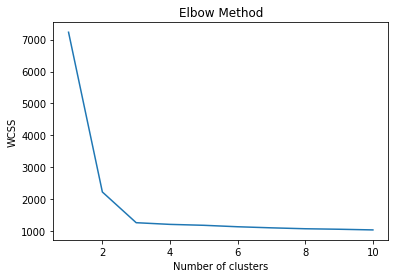

In [98]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_) # 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
clf = KMeans(n_clusters = 3, random_state=42)
clf.fit( X_train )
y_labels_train = clf.labels_

In [107]:
y_labels_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [0]:
y_labels_train = clf.labels_
y_labels_test = clf.predict(X_test)

In [111]:
y_labels_train = clf.labels_
y_labels_test = clf.predict(X_test)

X_train['km_clust'] = y_labels_train
X_test['km_clust'] = y_labels_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [112]:
print(len(y_labels_train))
print( X_train.shape )

10248
(10248, 27)


In [114]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,label,km_clust
13752,-0.160977,-0.260014,-0.212800,0.017743,-0.036420,0.077459,0.136094,-0.040047,0.245243,0.176621,-0.040494,-0.028531,0.156807,0.240203,-0.001781,0.025328,-0.000153,0.032914,0.028740,-0.030822,-0.060031,0.046909,-0.015031,-0.142365,0.029846,0,1
12589,-0.013762,0.004281,0.008167,-0.071565,-0.034896,0.149370,-0.037175,-0.026707,-0.053909,-0.024099,-0.015241,-0.017349,-0.045957,0.000336,-0.054076,0.012685,-0.014920,0.024060,0.016736,0.016276,-0.021300,0.081767,-0.028019,-0.011609,-0.007330,0,1
4387,-0.058894,-0.034093,-0.002446,-0.071399,0.094159,-0.013582,-0.007226,-0.055606,0.151791,-0.035848,-0.071088,-0.098033,-0.159627,-0.251793,-0.042711,0.134454,0.025374,-0.004544,0.027148,-0.005331,0.013842,-0.010033,-0.070035,0.050665,0.038486,0,1
9591,0.246957,-0.094701,-0.033590,-0.114688,-0.085207,-0.179265,0.021680,-0.017234,-0.100267,0.006529,-0.010737,-0.023289,-0.007013,-0.001885,-0.003267,-0.022349,0.009610,0.004574,0.008256,-0.033919,0.017033,-0.014603,-0.015820,0.020288,0.006326,0,1
14212,-0.020770,0.025001,0.029182,-0.059768,-0.014930,0.080959,-0.027848,0.034153,-0.049738,-0.041158,-0.009431,-0.021662,0.022984,0.058460,-0.053777,0.050506,0.036024,0.051545,-0.045744,0.054392,0.059889,-0.022932,0.006486,-0.026511,-0.001709,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,-0.005013,0.047216,0.021263,-0.049636,0.171862,0.003359,-0.027246,0.000993,-0.033239,-0.037983,-0.026166,-0.028715,0.017000,0.042878,-0.021194,0.004184,0.001865,0.007445,-0.024768,0.047997,0.028224,-0.007152,0.047385,0.025977,-0.007426,1,0
12252,-0.017250,0.017204,0.023052,-0.060567,-0.023597,0.091571,-0.018953,-0.005864,-0.041736,-0.015034,0.003259,-0.029609,0.003420,0.013937,0.030811,-0.023592,-0.031574,0.034467,-0.017704,-0.015057,-0.017958,-0.009034,-0.006449,0.002971,-0.003086,0,1
1346,-0.046937,-0.048400,0.102885,0.100288,-0.049981,-0.038456,-0.010107,-0.113865,0.205152,-0.075586,-0.022061,0.222799,0.019208,0.144155,-0.135997,-0.052605,-0.095407,0.069843,0.038301,-0.059736,0.015256,-0.010085,-0.037675,0.017286,0.040768,0,1
11646,-0.057498,-0.028092,-0.020490,-0.013756,-0.034202,-0.086541,-0.020778,0.018919,-0.083398,-0.044979,-0.000127,-0.030472,-0.020436,-0.025478,-0.073704,0.134066,0.060495,-0.000615,-0.043468,0.006860,-0.057560,-0.003969,-0.036358,0.004286,0.018848,0,1
